In [340]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"

In [341]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [342]:
df = pd.read_csv(url)

In [343]:
df.shape

(48895, 16)

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [345]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [346]:
df.drop("id", axis =1).duplicated().sum()

np.int64(0)

In [347]:
df.shape

(48895, 16)

In [348]:
df.drop(columns=["id", "host_id"], inplace=True)

In [349]:
df

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [350]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [351]:
df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [352]:
#statue of liberty coords
lat = 40.6892
long  = -74.0445


def distance(lat_0, long_0):
  result = np.sqrt(((lat - lat_0)**2) + ((long - long_0)**2))
  return result

In [353]:
df['distance'] = distance(df['latitude'], df['longitude'])

In [354]:
df.drop(labels='name',axis=1)

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,distance
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0.083321
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.088533
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0.157745
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0.084837
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0.148496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,0.095150
48891,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,0.112045
48892,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,0.157944
48893,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,0.086693


In [355]:
df

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,distance
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0.083321
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.088533
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0.157745
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0.084837
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0.148496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,0.095150
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,0.112045
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,0.157944
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,0.086693


/home/vscode/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


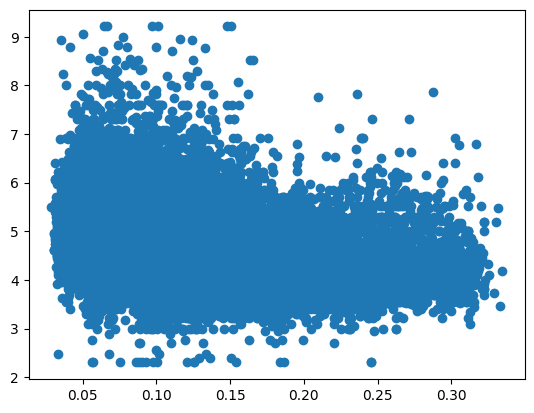

In [356]:
plt.scatter(df['distance'], np.log(df['price']))
plt.show()

In [357]:
df[['distance', 'price']].corr()

,distance,price
distance,1.000000,-0.141276
price,-0.141276,1.000000


In [358]:
df[['distance', 'price']].corr(method='spearman')

,distance,price
distance,1.000000,-0.360364
price,-0.360364,1.000000


In [359]:
np.corrcoef(df['distance'], np.log(df['price']))

/home/vscode/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2842: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


array([[ 1., nan],
       [nan, nan]])

In [360]:
# tabla 1 con neighbourhood
#

In [361]:
df['quartiles_precio']=pd.qcut(df['price'],[0,.25,.5,.75,1],labels=['bajo','medio','medio alto','alto'])
df

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,distance,quartiles_precio
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0.083321,medio alto
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.088533,alto
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0.157745,medio alto
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0.084837,medio
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0.148496,medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9,0.095150,medio
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36,0.112045,bajo
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27,0.157944,medio alto
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2,0.086693,bajo


In [362]:
df.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'distance',
       'quartiles_precio'],
      dtype='object')

In [363]:
df=df[['neighbourhood_group','distance','price','room_type','number_of_reviews','calculated_host_listings_count','quartiles_precio']].copy()

In [364]:
def is_binary(df_, nums):
    df = df_.copy()
    variables = []
    for var in nums:
        flag = True
        unique = df_[var].unique()
        for value in unique:
            if value not in [0, 1, np.nan, 0.0, 1.0]:
                flag = False
        if flag == True:
            variables.append(var)
    return variables

def breakdown_vars(df, off_binary=False):
    """
    This function allow us categorize accodign to numerical or not
    """
    binaries = is_binary(df, df.columns)
    categorial = []
    nonormal = []
    normal = []
    for t in df.columns:
        if off_binary == False:
          if (df[t].dtypes.name=="object" or df[t].dtypes.name=='category') and  t not in binaries:
            categorial.append(t)
        else:
           if (df[t].dtypes.name=="object" or df[t].dtypes.name=='category'):
            categorial.append(t)
        if (df[t].dtypes=="int64" or df[t].dtypes=="float64") and t not in binaries:
                n,p = stats.shapiro(df[t])
                if p<0.05:
                    nonormal.append(t)
                else:
                    normal.append(t)
    if off_binary == False:
      return categorial, binaries, nonormal, normal
    else:
      return categorial, nonormal, normal

In [365]:
cat, nonormal ,  normal = breakdown_vars(df,  off_binary=True)

/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 48895.
  res = hypotest_fun_out(*samples, **kwds)


In [366]:
cat

['neighbourhood_group', 'room_type', 'quartiles_precio']

In [367]:
from tableone  import TableOne, load_dataset
print(len(df.columns))
print(len(normal) + len(nonormal) + len(cat))
mytable = TableOne(df,categorical=cat, nonnormal=nonormal, groupby='quartiles_precio', pval=True)

/home/vscode/.local/lib/python3.10/site-packages/tableone/preprocessors.py:87: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupbylvls = sorted(data.groupby(groupby).groups.keys())  # type: ignore


7
7


/home/vscode/.local/lib/python3.10/site-packages/tableone/tables.py:372: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_cont = pd.pivot_table(cont_data, columns=[groupby], aggfunc=aggfuncs)
/home/vscode/.local/lib/python3.10/site-packages/tableone/tables.py:372: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_cont = pd.pivot_table(cont_data, columns=[groupby], aggfunc=aggfuncs)
/home/vscode/.local/lib/python3.10/site-packages/tableone/tables.py:372: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_co

In [368]:
mytable.to_excel("my-table.xlsx")

In [369]:
mytable

Grouped by quartiles_precio                                                                                                          
                                                                                   Missing             Overall              bajo             medio           medio alto                 alto P-Value
n                                                                                                        48895             12371             12101                12246                12177        
neighbourhood_group, n (%)                     Bronx                                                1091 (2.2)         574 (4.6)         305 (2.5)            150 (1.2)             62 (0.5)  <0.001
                                               Brooklyn                                           20104 (41.1)       6572 (53.1)       5422 (44.8)          4852 (39.6)          3258 (26.8)        
                                               Manhattan                                          21661 (44.3)       2514 (20.3)       4650 (38.4)          6222 (50.8)          8275 (68.0)        
                                               Queens                                              5666 (11.6)       2549 (20.6)       1610 (13.3)            967 (7.9)            540 (4.4)        
                                               Staten Island                                         373 (0.8)         162 (1.3)         114 (0.9)             55 (0.4)             42 (0.3)        
distance, median [Q1,Q3]                                                                 0       0.1 [0.1,0.1]     0.1 [0.1,0.2]     0.1 [0.1,0.1]        0.1 [0.1,0.1]        0.1 [0.1,0.1]  <0.001
price, median [Q1,Q3]                                                                    0  106.0 [69.0,175.0]  50.0 [43.0,60.0]  88.0 [77.0,99.0]  140.0 [120.0,150.0]  250.0 [200.0,325.0]  <0.001
room_type, n (%)                               Entire home/apt                                    25409 (52.0)         673 (5.4)       4232 (35.0)          9498 (77.6)         11006 (90.4)  <0.001
                                               Private room                                       22326 (45.7)      10869 (87.9)       7661 (63.3)          2683 (21.9)           1113 (9.1)        
                                               Shared room                                          1160 (2.4)         829 (6.7)         208 (1.7)             65 (0.5)             58 (0.5)        
number_of_reviews, median [Q1,Q3]                                                        0      5.0 [1.0,24.0]    5.0 [1.0,23.0]    6.0 [1.0,28.0]       6.0 [1.0,26.8]       4.0 [0.0,17.0]  <0.001
calculated_host_listings_count, median [Q1,Q3]                                           0       1.0 [1.0,2.0]     1.0 [1.0,3.0]     1.0 [1.0,2.0]        1.0 [1.0,2.0]        1.0 [1.0,2.0]  <0.001
quartiles_precio, n (%)                        bajo                                               12371 (25.3)     12371 (100.0)                                                              <0.001
                                               medio                                              12101 (24.7)                       12101 (100.0)                                                  
                                               medio alto                                         12246 (25.0)                                            12246 (100.0)                             
                                               alto                                               12177 (24.9)                                                                 12177 (100.0)

dist(a,b) = np.sqrt(((xb - xa)**2) + ((yb - ya)**2))